Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

3. Разделите данные на выборку для обучения и тестирования

4. Постройте модель LDA

5. Визуализируйте предсказания для тестовой выборки и центры классов

6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
#Берем датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_iris()

In [27]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['variety'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
variety = data.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
#Оставляем два признака - sepal_length и sepal_width и целевую переменную - variety
sdf = df[['sepal length (cm)', 'sepal width (cm)', 'variety']]
sdf.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [112]:
#Делим данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sdf, variety, test_size=0.25)

In [107]:
len(y_test)

38

In [113]:
#Cтроим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1])

In [114]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,2,1
3,1,1
4,0,0
5,1,1
6,1,2
7,0,0
8,0,0
9,2,2


In [115]:
lda.means_

array([[5.04285714, 3.50857143, 0.        ],
       [5.99      , 2.795     , 1.        ],
       [6.67567568, 3.03243243, 2.        ]])

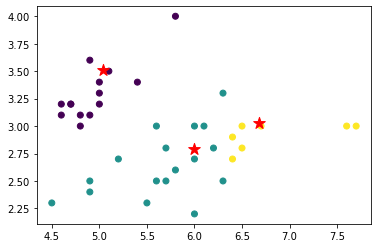

In [116]:
#Визуализируйте предсказания для тестовой выборки и центры классов
plt.scatter(X_test[['sepal length (cm)']], X_test[['sepal width (cm)']], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [95]:
#Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
ssdf = df[['sepal length (cm)', 'sepal width (cm)']]
ssdf.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [76]:
#Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
from sklearn.cluster import KMeans

In [79]:
k_inertia = []
ks = range(1, 10)
for k in ks:
    clf_kmeans = KMeans(n_clusters = k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    k_inertia.append(clf_kmeans.inertia_)

E:\DS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


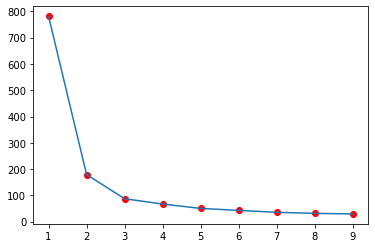

In [83]:
plt.plot(ks, k_inertia, 'ro')
plt.plot(ks, k_inertia)

In [92]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(ssdf)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

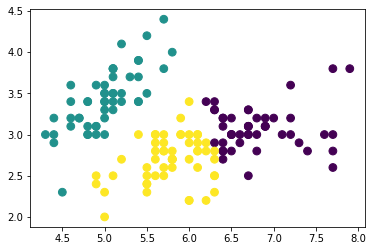

In [94]:
plt.scatter(ssdf[['sepal length (cm)']], ssdf[['sepal width (cm)']], c = clusters, s = 60)